# Questão 1

/tmp/ipykernel_1101448/1575178019.py:23: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  variancia_8=quad(integrando, 0, np.inf, args=8)[0]
/tmp/ipykernel_1101448/1575178019.py:30: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perh

Letra (A): Sigma_8 tem o valor de 0.696


/tmp/ipykernel_1101448/1575178019.py:43: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=20)


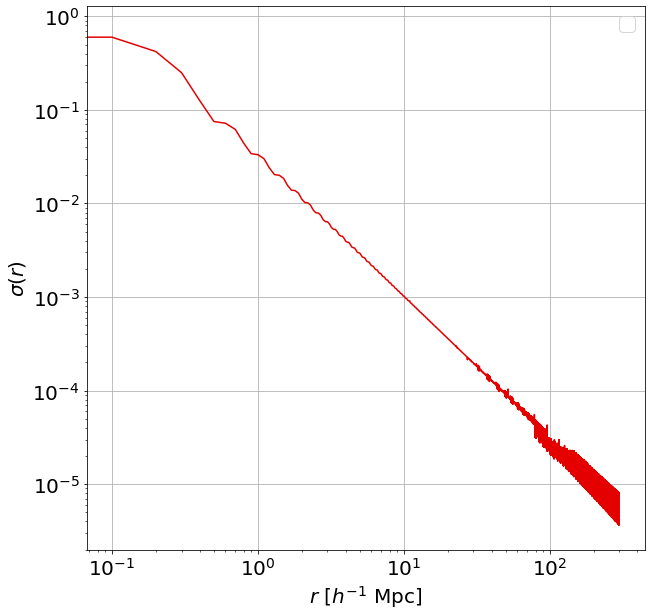

In [16]:
from scipy.integrate import quad
import scipy.constants as sc
import numpy as np
import matplotlib.pyplot as plt

a=3.4e6
km=0.0255

def potencia (k): 
    elevado_na_menos_dois=(1+(k/km)**(1.5))
    return a*k*elevado_na_menos_dois**(-2)

def janela(k,r): 
    x = k*r
    den=x**3
    num=3*(np.sin(x) -x*np.cos(x))
    return num/den

def integrando(k,r): return potencia(k)*(janela(k,r)**2)*(k**2)

rs=np.arange(0,300,0.1)

variancia_8=quad(integrando, 0, np.inf, args=8)[0]
variancia_8=(1/(2*np.pi**2))*variancia_8
variancia_8=np.sqrt(variancia_8)
print(f"Letra (A): Sigma_8 tem o valor de {variancia_8:.3f}")

variancias=[]
for r in rs:
    variancia=quad(integrando, r, np.inf, args=8)[0]
    variancia=(1/(2*np.pi**2))*variancia
    variancia=np.sqrt(variancia)
    variancias.append(variancia)

fig=plt.figure(figsize=[10,10])
plt.plot(rs,variancias, color='xkcd:red')
plt.xticks(size=20)
plt.yticks(size=20)
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$r$ [$h^{-1}$ Mpc]', size=20)
plt.ylabel(r'$\sigma(r)$', size=20)
plt.legend(fontsize=20)
plt.grid()
plt.savefig('varianciaXraio.png', dpi=200, facecolor='w', edgecolor='w', bbox_inches='tight')






